In [173]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x29c10ba32b0>)

In [174]:
import pandas as pd
data = pd.read_csv('medical.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [175]:
#now we will perform the visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [176]:
#AGE
data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [177]:
#now we will create a histogram
fig = px.histogram(data,x='age', nbins=47, title="distribution of ages")
fig.update_layout(bargap=0.1)
fig.show()

In [178]:
#distrbution of body mass index
fig =px.histogram(data, x='bmi', color_discrete_sequence=['red'], marginal='box', title='distribtion of bmi')
fig.update_layout(bargap=0.1)
fig.show()

In [179]:
#charges
#this is the data we are trying to predict 
# we will create a differentiator smoker
fig = px.histogram(data, x="charges",marginal='box', color='smoker', title="Annual Medical Charges" )
fig.update_layout(bargap=0.1)
fig.show()

In [180]:
fig = px.scatter(data, x='age', y='charges', color='smoker',hover_data=['sex'], title='Age vs. Charges' )
fig.update_traces(marker_size=5)
fig.show()


In [181]:
fig = px.scatter(data, x='bmi', y='charges', color="smoker", title="Bmi Vs Charges")
fig.update_traces(marker_size=5)
fig.show()

In [182]:
#Correlation
data.charges.corr(data.age)

data.charges.corr(data.bmi)

0.19834096883362878

In [183]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [184]:
smoker_value={'yes':1, 'no':0}
smoker_data = data.smoker.map(smoker_value)
data.charges.corr(smoker_data)

0.7872514304984782

Text(0.5, 1.0, 'Corrrelation Matrix')

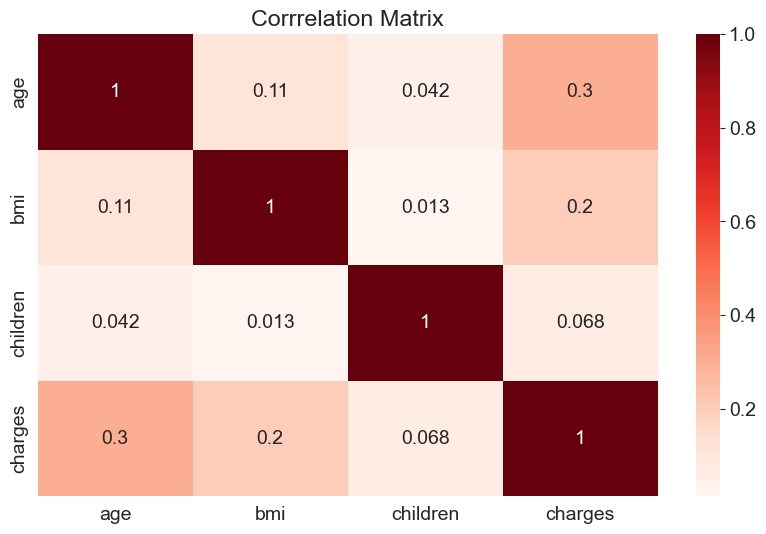

In [185]:
#Heatmap
# cmap=colors in the heatmap, annpt mean writing data value in each cell 
sns.heatmap(data.corr(), cmap='Reds', annot=True)
plt.title("Corrrelation Matrix")


<AxesSubplot:title={'center':'age vs charges'}, xlabel='age', ylabel='charges'>

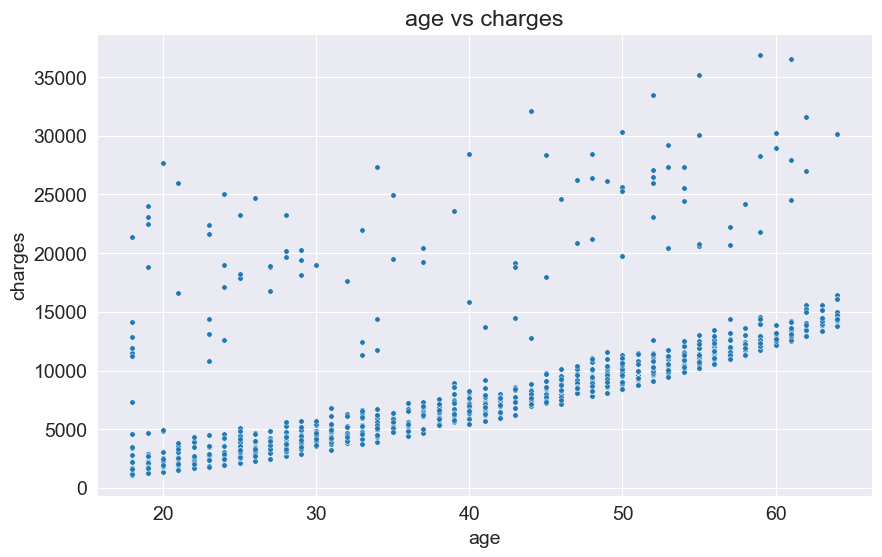

In [186]:
non_smoker_data = data[data.smoker=='no']

plt.title("age vs charges")
sns.scatterplot(data=non_smoker_data, x='age', y='charges', s=15)

In [187]:
#lets create a function to estimate the charges according 
# to the age
def estimated_charges(w, age, b):
    return w * age + b

In [188]:
w=50
b=100
ages = non_smoker_data.age
estimate_charges = estimated_charges(w, ages, b)


Text(0, 0.5, 'estimated_charges')

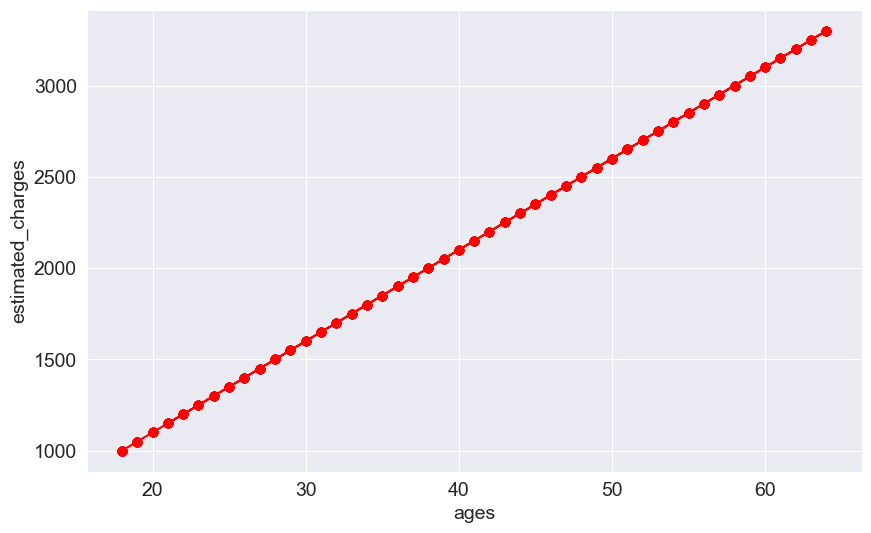

In [189]:
plt.plot(ages, estimate_charges, "r-o")
plt.xlabel("ages")
plt.ylabel("estimated_charges")

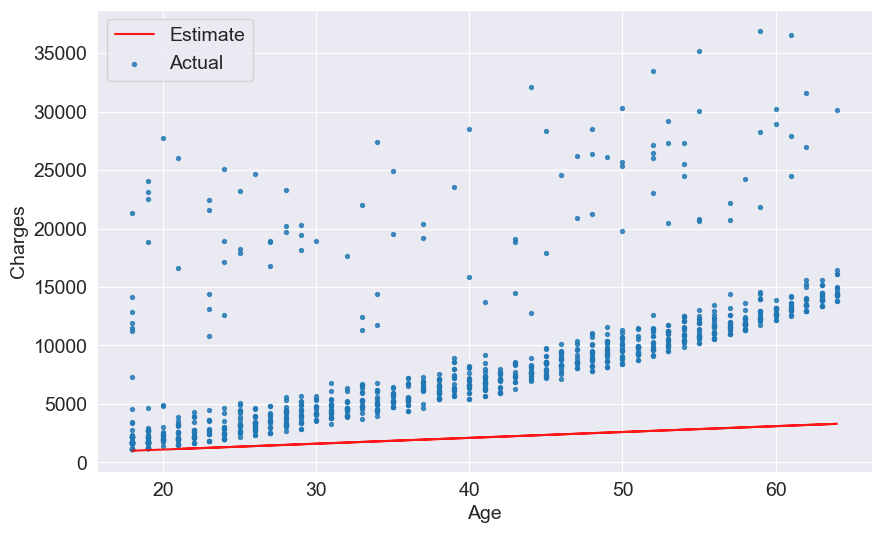

In [190]:
#now map this esttimate data ove rthe real data 
#to see if the model fits the data
target = non_smoker_data.charges
sns.set_style('darkgrid')
#target refers to as the charges of the non smoker data
plt.plot(ages, estimate_charges, 'r', alpha=0.9)
plt.scatter(ages, non_smoker_data.charges, s=8,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [191]:
#we make use of hit and trial to solve the issue
# we set values of the w and b and compute the line and the mapping

In [192]:
#function to input the age and the charges and then visualize using the data
def try_parameters(w, b):
    ages = non_smoker_data.age
    target = non_smoker_data.charges
    
    estimate_charges = estimated_charges(ages, w, b)
    
    plt.plot(ages, estimate_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

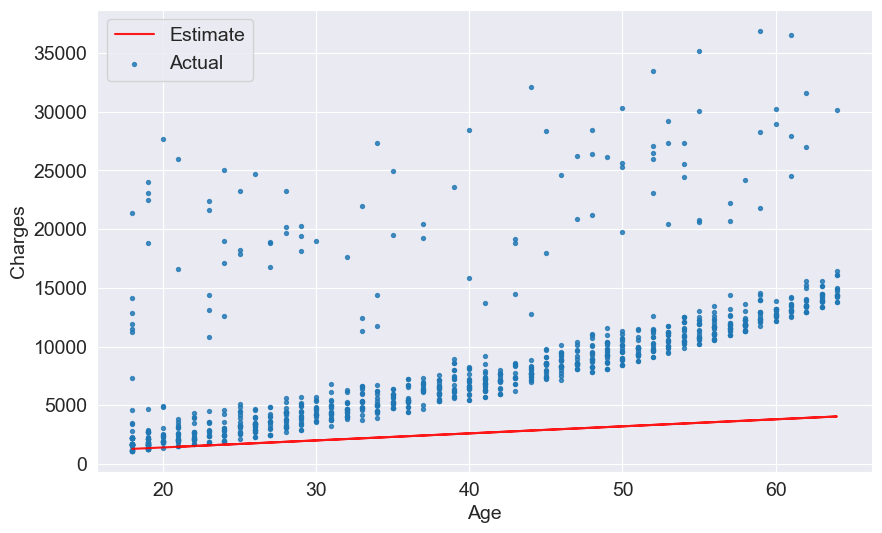

In [193]:
try_parameters(60, 200)


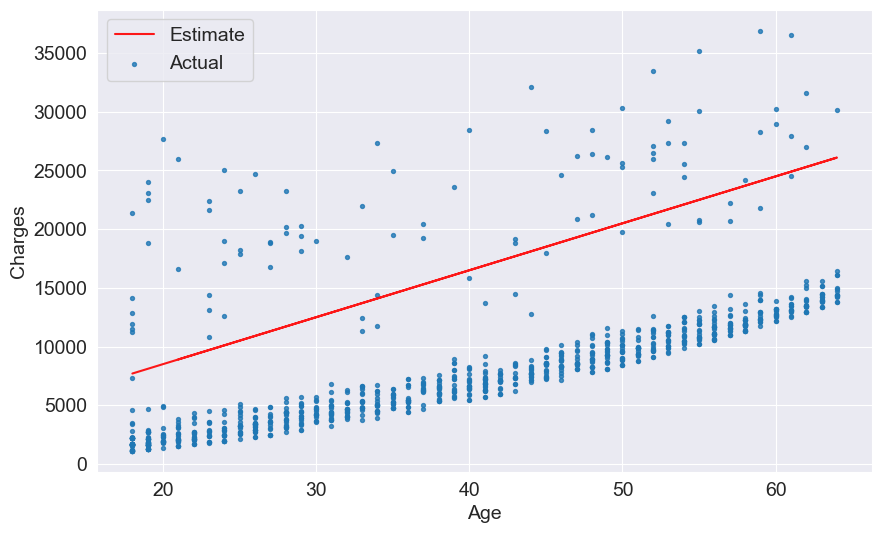

In [194]:
try_parameters(400, 500)

In [195]:
#LINEAR REGRESSION MODEL USING Scikitlearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [196]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [197]:
#X is a 2d array
#now we will provide input and target
inputs = non_smoker_data[['age']]
targets = non_smoker_data.charges


In [198]:
model.fit(inputs, targets)


LinearRegression()

In [199]:
import numpy as np
model.predict(np.array([[23] ,[37], [61]]))

C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [200]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [201]:
model.coef_

model.intercept_

-2091.4205565650864

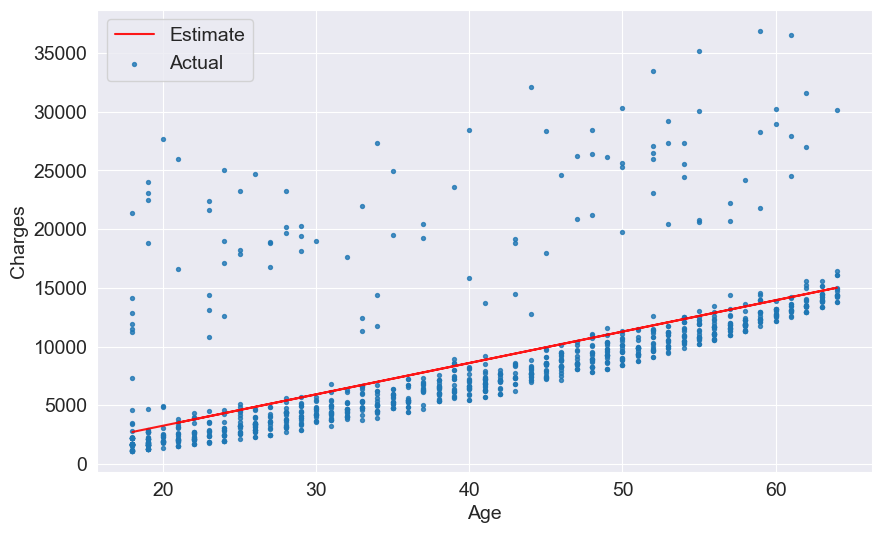

In [202]:
#visualize the line created by the above parameters
try_parameters(model.coef_ ,model.intercept_)
#Indeed the line is quite close to the points. It is slightly above the cluster of points, because it's also trying to ac count for the outliers.

In [203]:
#function to predict the rmse
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [204]:
rmse(model.coef_, model.intercept_)
rmse(targets, predictions)
#This is the loss computed by the initial model using the non smoker data


4662.505766636395

In [205]:
fig = px.scatter_3d(non_smoker_data, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

<AxesSubplot:xlabel='smoker', ylabel='charges'>

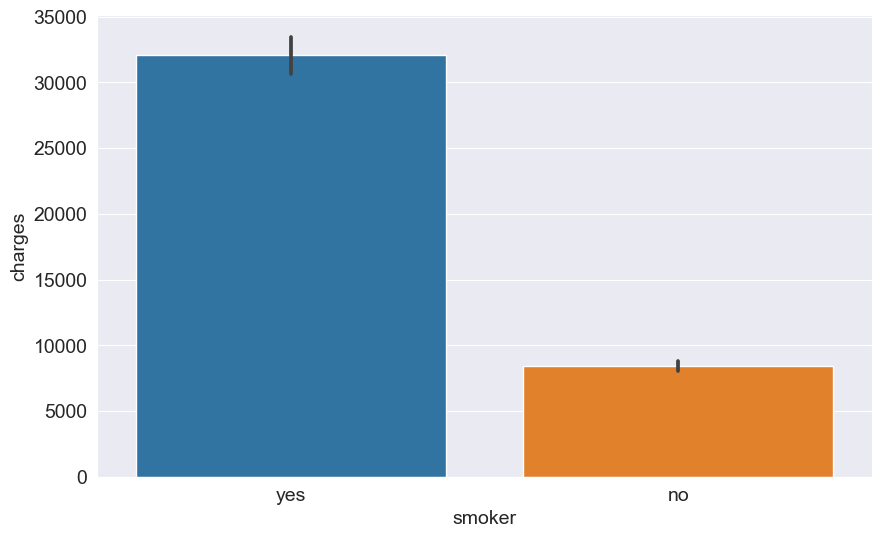

In [206]:
# using categorical data
#converting categorical data to the binary data
import seaborn as sns
sns.barplot(data=data, x='smoker', y='charges')

In [207]:
smoker_codes={'no':0, 'yes':1}
data['smoker_code'] = data.smoker.map(smoker_codes)


In [208]:
inputs, targets = data[['age', 'bmi', 'children', 'smoker_code']], data['charges']
model=LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss=rmse(targets, predictions)
print('loss: ' , loss)

loss:  6056.439217188081


In [209]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(data[['region']])
enc.categories_ 

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [210]:
one_hot = enc.transform(data[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [211]:
data[['northeast', 'northwest', 'southeast', 'southwest']] =one_hot
data

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [212]:
sex_codes = {'female': 0, 'male': 1}
data['sex_code'] = data.sex.map(sex_codes)

In [213]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = data[input_cols], data['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [214]:
#Model Improvements
#1)feature scaling:determining importance of each feature
from sklearn.preprocessing import StandardScaler
numeric_cols  = ['age', 'bmi','children']
scaler = StandardScaler()
scaler.fit(data[numeric_cols])


StandardScaler()

In [215]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [216]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [217]:
scaled_inputs = scaler.transform(data[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [218]:
#combine with categorical data
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = data[cat_cols].values

In [219]:
#we put scaler data and numerical data together
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = data.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


In [220]:
#now comapre weights
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [221]:
#Create a test set
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [222]:
#create and train the model
model  = LinearRegression().fit(inputs_train, targets_train)
# generate predictions
predictions_test = model.predict(inputs_test)

#compute the loss
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)


Test Loss: 6225.040240825867


Here's a strategy you can apply to approach any machine learning problem:

1)Explore the data and find correlations between inputs and targets
2)Pick the right model, loss functions and optimizer for the problem at hand
3)Scale numeric variables and one-hot encode categorical data
4)Set aside a test set (using a fraction of the training set)
5)Train the model
Make predictions on the test set and compute the loss
We'll apply this process to several problems in future tutorials.